## Task 1. 



Hojin Lee (hl3328) & Hyuk Joon Kwon (hk3084)

In [0]:
import keras
import matplotlib.pyplot as plt
import pandas as pd

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_digits
from keras.layers import Dense, Activation, BatchNormalization, Dropout

Using TensorFlow backend.


## Import Data from sklearn.datasets load_digits

In [0]:
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

1437 train samples
360 test samples


## The shape of the Data

In [0]:
X.shape

(1797, 64)

## This is what a single image looks like (Image representation of the integer 0)

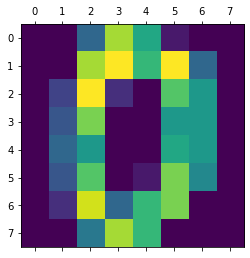

In [0]:
plt.matshow(digits.images[0])

In [0]:
def make_model(optimizer="adam",hidden_size=32,reg = 0.01):
  model = Sequential([Dense(hidden_size, input_shape=(64,),kernel_regularizer=regularizers.l2(reg), bias_regularizer=regularizers.l2(reg)), 
                      Activation('relu'), 
                      BatchNormalization(),
                      Dense(hidden_size, kernel_regularizer=regularizers.l2(reg), bias_regularizer=regularizers.l2(reg)), 
                      Dense(10), 
                      Activation('softmax')])
  model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=['accuracy']) 
  return model

In [0]:
clf = KerasClassifier(make_model)
param_grid = {'epochs': [5,10], 'hidden_size':[32,48,64,128],'reg': [0.1,0.01,0.001]}
grid = GridSearchCV(clf,param_grid=param_grid)
grid.fit(X_train,y_train)

Epoch 1/5
1149/1149 [==============================] - 0s 405us/step - loss: 8.7801 - accuracy: 0.2550
Epoch 2/5
1149/1149 [==============================] - 0s 50us/step - loss: 6.4387 - accuracy: 0.6005
Epoch 3/5
1149/1149 [==============================] - 0s 45us/step - loss: 4.8570 - accuracy: 0.7963
Epoch 4/5
1149/1149 [==============================] - 0s 46us/step - loss: 3.7589 - accuracy: 0.8660
Epoch 5/5
288/288 [==============================] - 0s 174us/step
Epoch 1/5
1149/1149 [==============================] - 0s 191us/step - loss: 8.7534 - accuracy: 0.3011
Epoch 2/5
1149/1149 [==============================] - 0s 45us/step - loss: 6.4115 - accuracy: 0.6823
Epoch 3/5
1149/1149 [==============================] - 0s 45us/step - loss: 4.8753 - accuracy: 0.8077
Epoch 4/5
1149/1149 [==============================] - 0s 45us/step - loss: 3.7486 - accuracy: 0.8816
Epoch 5/5
288/288 [==============================] - 0s 162us/step
Epoch 1/5
1150/1150 [===========================

KeyboardInterrupt: ignored

## Summary of results The best model seems to have 10 epochs a hidden layer size of 32 and an L2 regularizer of 0.01. As expected more epochs tend to lead to better results

In [0]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=['param_epochs','param_hidden_size','param_reg'],values=['mean_test_score','rank_test_score'])

mean_test_score  rank_test_score
param_epochs param_hidden_size param_reg                                  
5            32                0.001             0.886571               22
                               0.010             0.858694               24
                               0.100             0.872648               23
             48                0.001             0.908815               21
                               0.010             0.911605               20
                               0.100             0.914382               19
             64                0.001             0.932470               15
                               0.010             0.942235               12
                               0.100             0.938734               14
             128               0.001             0.949891                7
                               0.010             0.949889                8
                               0.100             0.950588                6
10           32                0.001             0.924843               17
                               0.010             0.930410               16
                               0.100             0.924826               18
             48                0.001             0.947113               10
                               0.010             0.949206                9
                               0.100             0.939458               13
             64                0.001             0.951273                5
                               0.010             0.959638                3
                               0.100             0.944309               11
             128               0.001             0.963804                2
                               0.010             0.967978                1
                               0.100             0.956843                4

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


In [0]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax')])

In [0]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.5024 - accuracy: 0.8645
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.2589 - accuracy: 0.9266
Epoch 3/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.2167 - accuracy: 0.9385
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1870 - accuracy: 0.9465
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1648 - accuracy: 0.9526
Epoch 6/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1492 - accuracy: 0.9570
Epoch 7/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1362 - accuracy: 0.9609
Epoch 8/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1245 - accuracy: 0.9641
Epoch 9/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1144 - accuracy: 0.9667
Epoch 10/10
60000/60000 [==============================

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.134
Test Accuracy: 0.959


In [0]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [0]:
digits = load_digits()

In [0]:
digits.data.shape

(1797, 64)

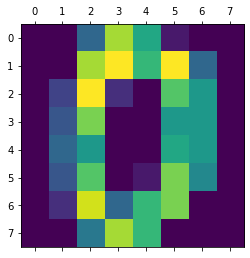

In [0]:
plt.matshow(digits.images[0])

In [0]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

1437 train samples
360 test samples


In [0]:
model = Sequential([
Dense(32, input_shape=(64,),kernel_regularizer=regularizers.l2(0.1), bias_regularizer=regularizers.l2(0.01)), Activation('relu'), Dense(10), Activation('softmax')])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
1437/1437 [==============================] - 0s 50us/step - loss: 51.1114 - accuracy: 0.1399
Epoch 2/10
1437/1437 [==============================] - 0s 11us/step - loss: 43.1980 - accuracy: 0.1573
Epoch 3/10
1437/1437 [==============================] - 0s 17us/step - loss: 37.0504 - accuracy: 0.1740
Epoch 4/10
1437/1437 [==============================] - 0s 11us/step - loss: 32.0914 - accuracy: 0.2331
Epoch 5/10
1437/1437 [==============================] - 0s 12us/step - loss: 27.8381 - accuracy: 0.3257
Epoch 6/10
1437/1437 [==============================] - 0s 12us/step - loss: 24.1563 - accuracy: 0.3953
Epoch 7/10
1437/1437 [==============================] - 0s 12us/step - loss: 20.9502 - accuracy: 0.4836
Epoch 8/10
1437/1437 [==============================] - 0s 11us/step - loss: 18.1573 - accuracy: 0.5685
Epoch 9/10
1437/1437 [==============================] - 0s 11us/step - loss: 15.7376 - accuracy: 0.6409
Epoch 10/10
1437/1437 [==============================] - 0s 12us

In [0]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 1293 samples, validate on 144 samples
Epoch 1/10
1293/1293 [==============================] - 0s 17us/step - loss: 0.1343 - accuracy: 0.9637 - val_loss: 0.1486 - val_accuracy: 0.9583
Epoch 2/10
1293/1293 [==============================] - 0s 16us/step - loss: 0.1287 - accuracy: 0.9683 - val_loss: 0.1478 - val_accuracy: 0.9583
Epoch 3/10
1293/1293 [==============================] - 0s 14us/step - loss: 0.1244 - accuracy: 0.9698 - val_loss: 0.1456 - val_accuracy: 0.9583
Epoch 4/10
1293/1293 [==============================] - 0s 14us/step - loss: 0.1218 - accuracy: 0.9683 - val_loss: 0.1446 - val_accuracy: 0.9583
Epoch 5/10
1293/1293 [==============================] - 0s 16us/step - loss: 0.1171 - accuracy: 0.9753 - val_loss: 0.1471 - val_accuracy: 0.9583
Epoch 6/10
1293/1293 [==============================] - 0s 17us/step - loss: 0.1174 - accuracy: 0.9729 - val_loss: 0.1510 - val_accuracy: 0.9583
Epoch 7/10
1293/1293 [==============================] - 0s 17us/step - loss: 0.1105

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

In [0]:
def make_model(optimizer="adam",hidden_size=32,reg = 0.01):
  model = Sequential([Dense(hidden_size, input_shape=(64,),kernel_regularizer=regularizers.l2(reg), bias_regularizer=regularizers.l2(reg)), Activation('relu'), Dense(10), Activation('softmax')])
  model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=['accuracy']) 
  return model

In [0]:
clf = KerasClassifier(make_model)
param_grid = {'epochs': [1,5,10], 'hidden_size':[32,64,256],'reg': [1,0.1,0.01,0.001]}

In [0]:
clf = KerasClassifier(make_model)
param_grid = {'epochs': [1,5,10], 'hidden_size':[32,64,256],'reg': [1,0.1,0.01,0.001]}
grid = GridSearchCV(clf,param_grid=param_grid)
grid.fit(X_train,y_train)
import pandas as pd
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=['param_epochs','param_hidden_size','param_reg'],values=['mean_test_score','rank_test_score'])

Epoch 1/1
288/288 [==============================] - 0s 91us/step
Epoch 1/1
288/288 [==============================] - 0s 93us/step
Epoch 1/1
287/287 [==============================] - 0s 82us/step
Epoch 1/1
287/287 [==============================] - 0s 97us/step
Epoch 1/1
287/287 [==============================] - 0s 91us/step
Epoch 1/1
288/288 [==============================] - 0s 96us/step
Epoch 1/1
288/288 [==============================] - 0s 112us/step
Epoch 1/1
287/287 [==============================] - 0s 93us/step
Epoch 1/1
287/287 [==============================] - 0s 94us/step
Epoch 1/1
287/287 [==============================] - 0s 91us/step
Epoch 1/1
288/288 [==============================] - 0s 88us/step
Epoch 1/1
288/288 [==============================] - 0s 92us/step
Epoch 1/1
287/287 [==============================] - 0s 94us/step
Epoch 1/1
287/287 [==============================] - 0s 99us/step
Epoch 1/1
287/287 [==============================] - 0s 97us/step
Epoch 1/1

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f601fb26550>,
             iid='deprecated', n_jobs=None,
             param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256],
                         'reg': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
import pandas as pd
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=['param_epochs','param_hidden_size','param_reg'],values=['mean_test_score','rank_test_score'])

mean_test_score  rank_test_score
param_epochs param_hidden_size param_reg                                  
1            32                0.001             0.317393               33
                               0.010             0.270666               34
                               0.100             0.212217               35
                               1.000             0.181657               36
             64                0.001             0.452265               31
                               0.010             0.558779               30
                               0.100             0.560813               29
                               1.000             0.402192               32
             256               0.001             0.873313               22
                               0.010             0.874018               21
                               0.100             0.869856               23
                               1.000             0.832953               24
5            32                0.001             0.800213               27
                               0.010             0.793252               28
                               0.100             0.823241               26
                               1.000             0.826694               25
             64                0.001             0.907416               15
                               0.010             0.895601               20
                               0.100             0.906047               17
                               1.000             0.903242               19
             256               0.001             0.961029                4
                               0.010             0.951999                6
                               0.100             0.959633                5
                               1.000             0.940142                9
10           32                0.001             0.904663               18
                               0.010             0.906052               16
                               0.100             0.913703               14
                               1.000             0.938071               10
             64                0.001             0.935959               12
                               0.010             0.946416                7
                               0.100             0.936672               11
                               1.000             0.944316                8
             256               0.001             0.967289                2
                               0.010             0.971467                1
                               0.100             0.963799                3
                               1.000             0.934587               13